In [0]:
## Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.color import rgb2gray
import pylab as pl
import pandas as pd

In [11]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
ls "/content/drive/My Drive/Colab Notebooks/"

ls: cannot access '/content/drive/My Drive/Colab Notebooks/': No such file or directory


In [15]:
X=np.load('/content/drive/My Drive/train_data.npy')
Y=np.load('/content/drive/My Drive/train_labels.npy')
labels = ['A','B','C','D','E','F','G','H','I']
X.shape, Y.shape

((1844, 100, 100, 3), (1844, 1))

In [18]:
# Vectorize origional data so other preprocessing techniques can be used. 
Xtrain2 = []
for k in range(len(X)):   
        X_train1 = rgb2gray(X[k,:,:,:])
        Xtrain2 += [X_train1.ravel()]
Xtrain2 = np.array(Xtrain2)
Xtrain2.shape, X.shape, len(X)

((1844, 10000), (1844, 100, 100, 3), 1844)

In [20]:
## Normalize and separate data into training and validation sets.
from sklearn.model_selection import train_test_split

X_train_norm = Xtrain2/255

X_train, X_test, y_train, y_test = train_test_split(X_train_norm, Y, test_size=0.2)
y_train = np.array(y_train.ravel())
y_test = np.array(y_test.ravel())
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1475, 10000), (369, 10000), (1475,), (369,))

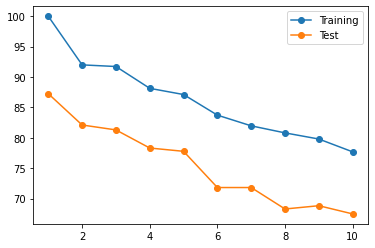

In [22]:
import sys
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

N = 10
kset = np.arange(1,N+1)
Acc = np.zeros((N,2))

for k in kset:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform',metric = 'minkowski', p = 2)
    clf.fit(X_train, y_train)
    Acc[k-1,:] = [round(clf.score(X_train, y_train.ravel())*100,2),round(clf.score(X_test, y_test.ravel())*100,2)]

plt.plot(kset, Acc[:,0], '-o', label = 'Training')
plt.plot(kset, Acc[:,1], '-o', label = 'Test')
plt.legend();

[[48  1  0  1  1  0  2  0  0]
 [ 1 26  5  0  1  4  0  0  0]
 [ 0  0 38  0  2  2  0  0  0]
 [ 0  0  0 30  1  2  0  0  0]
 [ 1  1  1  0 36  2  1  0  0]
 [ 0  5  0  0  1 32  0  0  0]
 [ 0  0  0  0  0  0 38  5  0]
 [ 0  0  0  0  0  0  4 34  0]
 [ 1  1  0  0  0  1  0  0 40]]


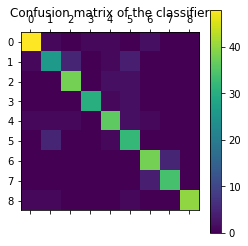

In [23]:
# plot confusion matrix 
# Recalculate  KNN with best value of K 
clf = KNeighborsClassifier(n_neighbors=1, weights = 'uniform', metric = 'minkowski', p = 2)
model     = clf.fit(X_train, y_train)   
predicted = clf.predict(X_test)


cm = confusion_matrix(predicted, y_test)
print(cm)

pl.matshow(cm) 
pl.title('Confusion matrix of the classifier') 

pl.colorbar() 

pl.show()

In [24]:
clf = KNeighborsClassifier(n_neighbors=1, weights = 'uniform',metric = 'minkowski', p = 2)
clf.fit(X_train, y_train)
ACC = clf.score(X_train, y_train)
ACC2 = clf.score(X_test, y_test)
print("Best KNN training Accuracy: ", ACC)
print("Best KNN test Accuracy: ", ACC2)

Best KNN training Accuracy:  1.0
Best KNN test Accuracy:  0.8726287262872628


In [0]:
# BASICALLY THE WHOLE LAB USING KNN CLASSIFIER 
import numpy as np 
from scipy import ndimage 
from skimage.color import rgb2gray
from skimage import data, filters 
from sklearn.preprocessing import FunctionTransformer 
from sklearn.pipeline import Pipeline 

def grayscale_img(X): 
    """Convert RGB image to grayscale image"""
    if(X.shape[1:] != (100, 100, 3)): 
        raise ValueError('Grayscale: shape must be (k, 100, 100, 3)!')
    output=np.asarray(a=[rgb2gray(X[k,:,:,:]) for k in range(len(X))]).reshape(X.shape[0], 100, 100, 1)
    print('Grayscale: X.shape:\t{}\n'.format(output.shape))
    return output
    
    
def vectorize_img(X): 
    """Flatten image into a 1D vector"""
    if(X.shape[1:] != (100, 100, 1)): 
        raise ValueError('Vectorize: shape must be (k, 100, 100, 1)!')
    output=np.asarray(a=[X[k].flatten() for k in range(len(X))])
    print('Vectorize: X.shape:\t{}\n'.format(output.shape))
    return output 
    
# testing only
def vectorize_img_inv(X):
    """Inverse of vectorize_img by converting flattened image into 100x100 grayscale image"""
    if(X.ndim != 2): 
        raise ValueError('Vectorize_Inv: each image must be 1D!')
    output=X.reshape(X.shape[0], 100, 100, 1)
    print('Vectorize_Inv: X.shape:\t{}\n'.format(output.shape))
    return output 

def normalize_img(X_vector):
    """Normalize each pixel intensity value in vectorized image"""
    if(X_vector.ndim != 2): 
        raise ValueError('Normalize: each image must be 1D!')
    output=X_vector/255
    print('Normalize: X.shape:\t{}\n'.format(output.shape))
    return output 

# testing only 
def normalize_img_inv(X_vector):
    """Inverse of normalize_img by scaling intensity of each pixel by 255"""
    if(X_vector.ndim != 2): 
        raise ValueError('Normalize_Inv: each image must be 1D!')
    output=X_vector*255 
    print('Normalize_Inv: X.shape:\t{}\n'.format(output.shape))
    return output 

# converting each function to FunctionTransformer type to be compatible in Pipeline 
grayscale_img_func=FunctionTransformer(func=grayscale_img)
vectorize_img_func=FunctionTransformer(func=vectorize_img, inverse_func=vectorize_img_inv)
normalize_img_func=FunctionTransformer(func=normalize_img, inverse_func=normalize_img_inv)

from sklearn.neighbors import KNeighborsClassifier
estimators = [
    ('Grayscale', grayscale_img_func),
    ('Vectorize', vectorize_img_func),
    ('Normalize', normalize_img_func), 
    ('KNN', KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='minkowski', p=2))
] 
img_pipeline=Pipeline(estimators)

# generating scores 
def pipeline_score(X_train, X_test, y_train, y_test): 
    """
        Compute the score for model trained by pipeline-preprocessed training set and
        then tested on the testing set. 
    """
    ip_model=img_pipeline.fit(X=X_train, y=y_train)
    return ip_model.score(X=X_test, y=y_test)

# example 
from sklearn.model_selection import train_test_split

# use below when running from local desktop 
# X=np.load('train_data.npy')
# Y=np.load('train_labels.npy')

# use below when running on Google collab 
X=np.load('/content/drive/My Drive/train_data.npy')
Y=np.load('/content/drive/My Drive/train_labels.npy')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
print('X_train.shape:\t{}\n'.format(X_train.shape)) 
print('X_test.shape:\t{}\n'.format(X_test.shape)) 
print('y_train.shape:\t{}\n'.format(y_train.shape)) 
print('y_test.shape:\t{}\n'.format(y_test.shape)) 
print('Score:\t{}\n'.format(
    pipeline_score(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
))


X_train.shape:	(1475, 100, 100, 3)

X_test.shape:	(369, 100, 100, 3)

y_train.shape:	(1475, 1)

y_test.shape:	(369, 1)

Grayscale: X.shape:	(1475, 100, 100, 1)

Vectorize: X.shape:	(106, 10000)

Vectorize_Inv: X.shape:	(106, 100, 100, 1)

Vectorize: X.shape:	(1475, 10000)

Normalize: X.shape:	(106, 10000)

Normalize_Inv: X.shape:	(106, 10000)

Normalize: X.shape:	(1475, 10000)



/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Grayscale: X.shape:	(369, 100, 100, 1)

Vectorize: X.shape:	(369, 10000)

Normalize: X.shape:	(369, 10000)

Score:	0.9051490514905149



Steps of Pipeline:

1. Each image is converted to grayscale using rgb2gray from skimage.color. This is in preparation for Sobel edge detection. Edge detenction only focuses on change between brightness or intensity of color, rather than the rgb value. Converting each image to grayscale allows us to entirely focus on intensity of the pixels. 

2. Vectorizing i.e. flattening each image into a single 1D vector allows streamlined performance and easier layout for debugging. Most importantly, this reduces the dimensionality of X data set to 2 dimensions with shape (k, 10000). Only a 2D array or matrix is compatible with sklearn estimators. 

3. Normalizing the intensity of each pixel for all images puts the images on a more equal playing field. Different camera quality and different background lighting may cause a greater variation of average pixel intensities across images for the same letter. Normalization reduces each image to the same but smaller interval of allowed values (0 to 1). This reduces the variation in intensity across images. 

4. As empirically discovered in Lab 3, SVM beats the other tested estimators as having the best accuracy. Feeding a multi-step preprocessed data set as input into SVM, which is configured with optimal values for C and gamma from empirical testing, should theoretically combine to form the best pipeline. 
